In [1]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np
sns.set()

frogs = pd.read_csv('./datasets/frog_tongue.txt', header=[14])
frogs.date = pd.to_datetime(frogs.date, format='%Y_%m_%d')
frogs.head()

,date,ID,trial number,impact force (mN),impact time (ms),impact force / body weight,adhesive force (mN),time frog pulls on target (ms),adhesive force / body weight,adhesive impulse (N-s),total contact area (mm2),contact area without mucus (mm2),contact area with mucus / contact area without mucus,contact pressure (Pa),adhesive strength (Pa)
0,2013-02-26,I,3,1205,46,1.95,-785,884,1.27,-0.290,387,70,0.82,3117,-2030
1,2013-02-26,I,4,2527,44,4.08,-983,248,1.59,-0.181,101,94,0.07,24923,-9695
2,2013-03-01,I,1,1745,34,2.82,-850,211,1.37,-0.157,83,79,0.05,21020,-10239
3,2013-03-01,I,2,1556,41,2.51,-455,1025,0.74,-0.170,330,158,0.52,4718,-1381
4,2013-03-01,I,3,493,36,0.80,-974,499,1.57,-0.423,245,216,0.12,2012,-3975


### These data are from the paper:
Kleinteich and Gorb, Sci. Rep., 4, 5225, 2014.
Importantly, the ID refers to the identifites of the frogs they tested.
*  I:   adult, 63 mm snout-vent-length (SVL) and 63.1 g body weight,
       Ceratophrys cranwelli crossed with Ceratophrys cornuta
*  II:  adult, 70 mm SVL and 72.7 g body weight,
       Ceratophrys cranwelli crossed with Ceratophrys cornuta
*  III: juvenile, 28 mm SVL and 12.7 g body weight, Ceratophrys cranwelli
*  IV:  juvenile, 31 mm SVL and 12.7 g body weight, Ceratophrys cranwelli

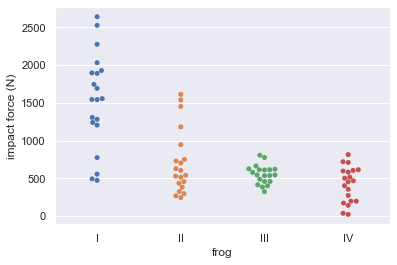

In [2]:
# Make bee swarm plot
_ = sns.swarmplot(x=frogs['ID'], y=frogs['impact force (mN)'], data=frogs)

# Label axes
_ = plt.xlabel('frog')
_ = plt.ylabel('impact force (N)')

# Show the plot
plt.show()

## Permutation test on frog data

The average strike force of Frog I was 0.71 Newtons (N), and that of Frog II was 0.42 N for a difference of 0.29 N. It is possible the frogs strike with the same force and this observed difference was by chance. You will compute the probability of getting at least a 0.29 N difference in mean strike force under the hypothesis that the distributions of strike forces for the two frogs are identical. We use a permutation test with a test statistic of the difference of means to test this hypothesis.

For your convenience, the data has been stored in the arrays force_a and force_b.

### Instructions
* Define a function with call signature diff_of_means(data_1, data_2) that returns the differences in means between two data sets, mean of data_1 minus mean of data_2.
* Use this function to compute the empirical difference of means that was observed in the frogs.
* Draw 10000 permutation replicates of the difference of means.
* Compute the p-value.
* Print the p-value.

In [3]:
force_a = frogs['impact force (mN)'][frogs.ID == 'II'].div(1000).to_list()
force_b = frogs['impact force (mN)'][frogs.ID == 'IV'].div(1000).to_list()
print('Mean force of frog a: ' + str(np.mean(force_a)))
print('Mean force of frog b: ' + str(np.mean(force_b)))

Mean force of frog a: 0.7073500000000001
Mean force of frog b: 0.4191000000000001


In [4]:
# helping funcs:

def permutation_sample(data1, data2):
    """Generate a permutation sample from two data sets."""

    # Concatenate the data sets: data
    data = np.concatenate((data1, data2))

    # Permute the concatenated array: permuted_data
    permuted_data = np.random.permutation(data)

    # Split the permuted array into two: perm_sample_1, perm_sample_2
    perm_sample_1 = permuted_data[:len(data1)]
    perm_sample_2 = permuted_data[len(data1):]

    return perm_sample_1, perm_sample_2

def draw_perm_reps(data_1, data_2, func, size=1):
    """Generate multiple permutation replicates."""

    # Initialize array of replicates: perm_replicates
    perm_replicates = np.empty(size)

    for i in range(size):
        # Generate permutation sample
        perm_sample_1, perm_sample_2 = permutation_sample(data_1, data_2)

        # Compute the test statistic
        perm_replicates[i] = func(perm_sample_1, perm_sample_2)

    return perm_replicates

def bootstrap_replicate_1d(data, func):
    """Generate bootstrap replicate of 1D data."""
    bs_sample = np.random.choice(data, len(data))
    return func(bs_sample)

def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)

    return bs_replicates

In [5]:
def diff_of_means(data_1, data_2):
    """Difference in means of two arrays."""

    # The difference of means of data_1, data_2: diff
    diff = np.mean(data_1) - np.mean(data_2)

    return diff

# Compute difference of mean impact force from experiment: empirical_diff_means
empirical_diff_means = diff_of_means(force_a, force_b)

# Draw 10,000 permutation replicates: perm_replicates
perm_replicates = draw_perm_reps(force_a, force_b,
                                 diff_of_means, size=10000)

# Compute p-value: p
p = np.sum(perm_replicates >= empirical_diff_means) / len(perm_replicates)

# Print the result
print('p-value =', p)

p-value = 0.0049


(array([  48.,  234.,  800., 1633., 2359., 2422., 1575.,  702.,  200.,
          27.]),
 array([-0.37545, -0.29953, -0.22361, -0.14769, -0.07177,  0.00415,
         0.08007,  0.15599,  0.23191,  0.30783,  0.38375]),
 <BarContainer object of 10 artists>)

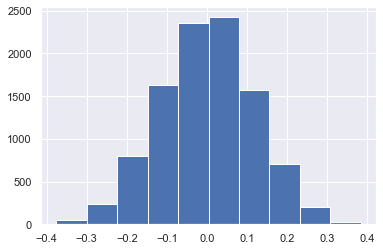

In [21]:
plt.hist(perm_replicates)

The p-value tells you that there is about a 0.4% chance that you would get the difference of means observed in the experiment if frogs were exactly the same. A p-value below 0.01 is typically said to be "statistically significant," but: warning! warning! warning! You have computed a p-value; it is a number. I encourage you not to distill it to a yes-or-no phrase. p = 0.004 and p = 0.000000004 are both said to be "statistically significant," but they are definitely not the same!

## A one-sample bootstrap hypothesis test
Another juvenile frog was studied, Frog C, and you want to see if Frog B and Frog C have similar impact forces. Unfortunately, you do not have Frog C's impact forces available, but you know they have a mean of 0.55 N. Because you don't have the original data, you cannot do a permutation test, and you cannot assess the hypothesis that the forces from Frog B and Frog C come from the same distribution. You will therefore test another, less restrictive hypothesis: The mean strike force of Frog B is equal to that of Frog C.

To set up the bootstrap hypothesis test, you will take the mean as our test statistic. Remember, your goal is to calculate the probability of getting a mean impact force less than or equal to what was observed for Frog B if the hypothesis that the true mean of Frog B's impact forces is equal to that of Frog C is true. You first translate all of the data of Frog B such that the mean is 0.55 N. This involves adding the mean force of Frog C and subtracting the mean force of Frog B from each measurement of Frog B. This leaves other properties of Frog B's distribution, such as the variance, unchanged.

### Instructions
* Translate the impact forces of Frog B such that its mean is 0.55 N.
* Use your draw_bs_reps() function to take 10,000 bootstrap replicates of the mean of your translated forces.
* Compute the p-value by finding the fraction of your bootstrap replicates that are less than the observed mean impact force of * Frog B. Note that the variable of interest here is force_b.
* Print your p-value.

In [24]:
# Make an array of translated impact forces: translated_force_b
translated_force_b = force_b - np.mean(force_b) + 0.55 # N

# Take bootstrap replicates of Frog B's translated impact forces: bs_replicates
bs_replicates = draw_bs_reps(translated_force_b, np.mean, 10000)

# Compute fraction of replicates that are less than the observed Frog B force: p
p = np.sum(bs_replicates <= np.mean(force_b)) / 10000

# Print the p-value
print('p = ', p)

p =  0.0073


The low p-value suggests that the null hypothesis that Frog B and Frog C have the same mean impact force is false.

## Extra: A bootstrap test for identical distributions
In the video, we looked at a one-sample test, but we can do two sample tests. We can even test the same hypothesis that we tested with a permutation test: that the Frog A and Frog B have identically distributed impact forces. To do this test on two arrays with n1 and n2 entries, we do a very similar procedure as a permutation test. We concatenate the arrays, generate a bootstrap sample from it, and take the first n1 entries of the bootstrap sample as belonging to the first data set and the last n2 as belonging to the second. We then compute the test statistic, e.g., the difference of means, to get a bootstrap replicate. The p-value is the number of bootstrap replicates for which the test statistic is greater than what was observed.

Now, you will perform a bootstrap test of the hypothesis that Frog A and Frog B have identical distributions of impact forces using the difference of means test statistic.

The two arrays are available to you as force_a and force_b.

### INSTRUCTIONS
* Compute the observed difference in impact force using the diff_of_means() function you already wrote.
* Create an array that is the concatenation of force_a and force_b.
* Initialize the bs_replicates array using np.empty() to store 10,000 bootstrap replicates.
* Write a for loop to
* Generate a bootstrap sample from the concatenated array.
* Compute the difference in means between the first len(force_a) last len(force_b) entries of the bootstrap sample.
* Compute and print the p-value from your bootstrap replicates.

In [23]:
# Compute difference of mean impact force from experiment: empirical_diff_means
empirical_diff_means = diff_of_means(force_a, force_b)

# Concatenate forces: forces_concat
forces_concat = np.concatenate((force_a, force_b))

# Initialize bootstrap replicates: bs_replicates
bs_replicates = np.empty(10000)

# Initialize bootstrap replicates: bs_replicates
bs_replicates = np.empty(10000)

for i in range(10000):
    # Generate bootstrap sample
    bs_sample = np.random.choice(forces_concat, size=len(forces_concat))

    # Compute replicate
    bs_replicates[i] = diff_of_means(bs_sample[:len(force_a)],
                                     bs_sample[len(force_a):])

# Compute and print p-value: p
p = np.sum(bs_replicates >= empirical_diff_means) / len(bs_replicates)
print('p-value =', p)

p-value = 0.0071


## A two-sample bootstrap hypothesis test for difference of means
We now want to test the hypothesis that Frog A and Frog B have the same mean impact force, but not necessarily the same distribution, which is also impossible with a permutation test.

To do the two-sample bootstrap test, we shift both arrays to have the same mean, since we are simulating the hypothesis that their means are, in fact, equal. We then draw bootstrap samples out of the shifted arrays and compute the difference in means. This constitutes a bootstrap replicate, and we generate many of them. The p-value is the fraction of replicates with a difference in means greater than or equal to what was observed.

The objects forces_concat and empirical_diff_means are already in your namespace.

### Instructions
* Compute the mean of all forces (from forces_concat) using np.mean().
* enerate shifted data sets for both force_a and force_b such that the mean of each is the mean of the concatenated array of impact forces.
* Generate 10,000 bootstrap replicates of the mean each for the two shifted arrays.
* Compute the bootstrap replicates of the difference of means by subtracting the replicates of the shifted impact force of Frog B from those of Frog A.
* Compute and print the p-value from your bootstrap replicates.

In [24]:
# Compute mean of all forces: mean_force
mean_force = np.mean(forces_concat)

# Generate shifted arrays
force_a_shifted = force_a - np.mean(force_a) + mean_force
force_b_shifted = force_b - np.mean(force_b) + mean_force 

# Compute 10,000 bootstrap replicates from shifted arrays
bs_replicates_a = draw_bs_reps(force_a_shifted, np.mean, 10000)
bs_replicates_b = draw_bs_reps(force_b_shifted, np.mean, 10000)

# Get replicates of difference of means: bs_replicates
bs_replicates = bs_replicates_a - bs_replicates_b

# Compute and print p-value: p
p = np.sum(bs_replicates >= np.mean(empirical_diff_means)) / 10000
print('p-value =', p)

p-value = 0.0058
